# LAB 1 Linear Regression in R

### TEAM F
Chouliarias Andreas 2143

Matzoros Christos-Konstantinos 2169

Pappas Apostolos 2109

In this Jupyter Notebook, we apply the Linear Regression algorithm to the fixed acidity and PH relationship. Firstly, we need to obtain the data and store it into a data frame:

In [9]:
# dataframe of the csv
df <- read.csv("winequality-red.csv", header = TRUE, sep = ',')

#print only the first values of the dataframe
head(df)


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Now, let's have a look at that relationship and assess its linearity:

Correlation:  -0.6829782

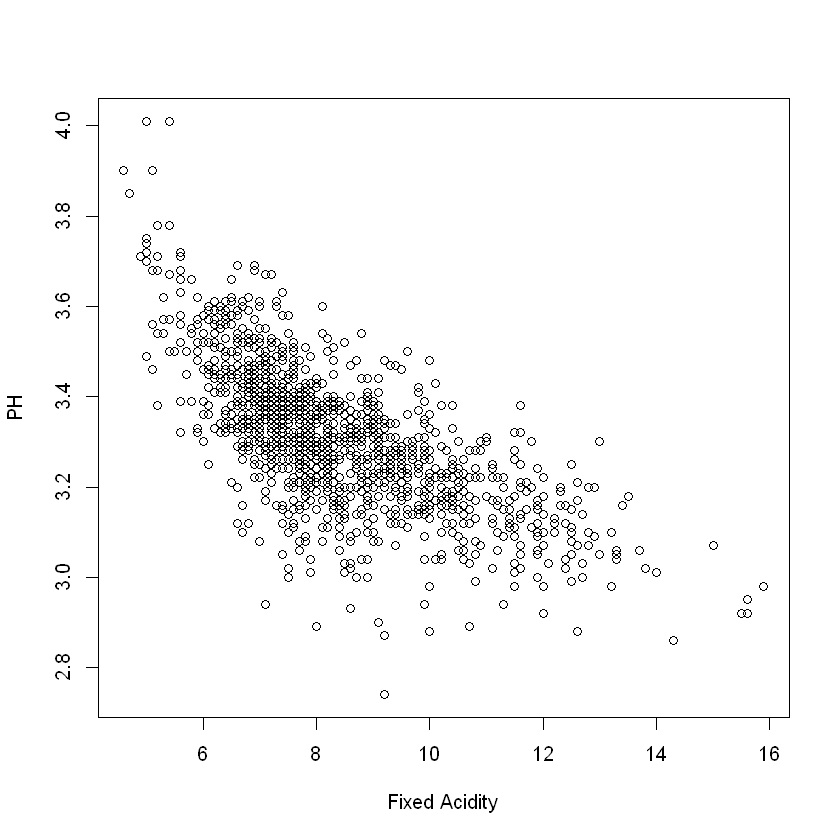

In [10]:
# plot the relationship
plot(df$fixed.acidity, df$pH, xlab = "Fixed Acidity", ylab = "PH")

corr <- cor(df$fixed.acidity, df$pH)
cat("Correlation: ", corr)

The next step is to split the data into a train and test set. We use 70% of the data to train the model and 30% to test the model. We will sample the 70% of the data for training purposes:

In [11]:
set.seed(123) # to get the same random samples

# sample the dataframe
sample.data <- sample(1:nrow(df), 0.7*nrow(df), replace = FALSE)

# randomly sampled data to be used as training data
train.data <- df[sample.data,]
head(train.data)

# randomly sampled data to be used as testing data
test.data <- df[-sample.data,]
head(test.data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
460,11.6,0.580,0.66,2.2,0.074,10,47,1.00080,3.25,0.57,9.0,3
1260,6.8,0.640,0.00,2.7,0.123,15,33,0.99538,3.44,0.63,11.3,6
654,9.4,0.330,0.59,2.8,0.079,9,30,0.99760,3.12,0.54,12.0,6
1410,6.0,0.510,0.00,2.1,0.064,40,54,0.99500,3.54,0.93,10.7,6
1501,7.5,0.725,0.04,1.5,0.076,8,15,0.99508,3.26,0.53,9.6,5
73,7.7,0.690,0.22,1.9,0.084,18,94,0.99610,3.31,0.48,9.5,5


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
14,7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5
18,8.1,0.56,0.28,1.7,0.368,16,56,0.9968,3.11,1.28,9.3,5
23,7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5
24,8.5,0.49,0.11,2.3,0.084,9,67,0.9968,3.17,0.53,9.4,5
25,6.9,0.40,0.14,2.4,0.085,21,40,0.9968,3.43,0.63,9.7,6


Now that we have taken samples of the data for training and testing, we are able to train/construct our linear regression model as follows:

In [12]:
data <- train.data # we use the data variable for prediction purposes

lr.model <- lm(data$pH ~ data$fixed.acidity)

summary(lr.model)


Call:
lm(formula = data$pH ~ data$fixed.acidity)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44574 -0.06372  0.00235  0.06503  0.52303 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.808509   0.016079  236.86   <2e-16 ***
data$fixed.acidity -0.059545   0.001879  -31.69   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1107 on 1117 degrees of freedom
Multiple R-squared:  0.4734,	Adjusted R-squared:  0.4729 
F-statistic:  1004 on 1 and 1117 DF,  p-value: < 2.2e-16


We then plot the regression line with our training data:

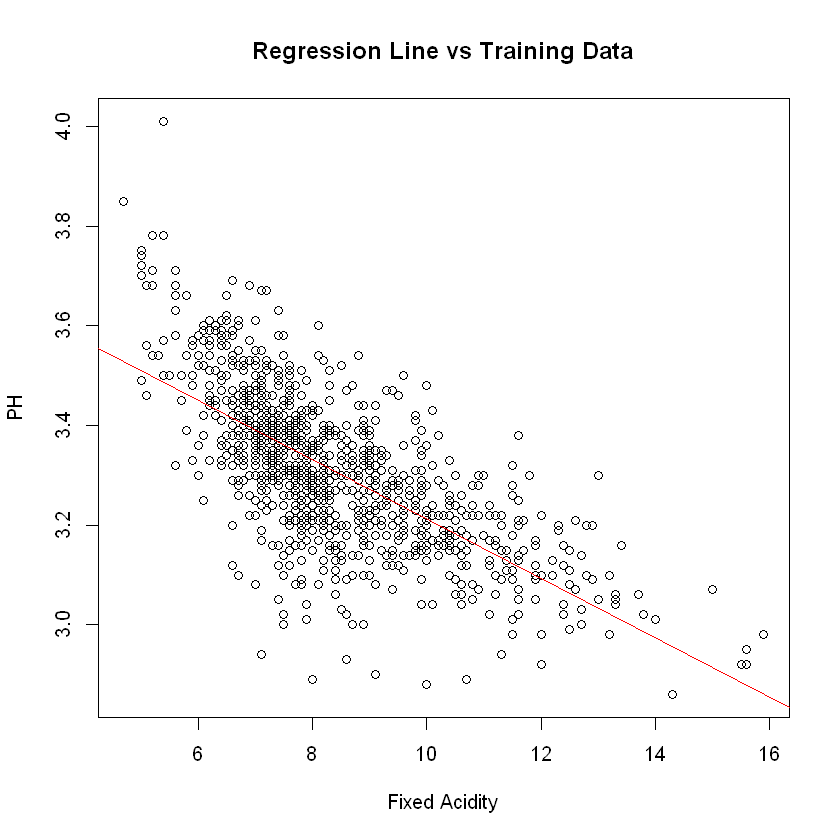

In [13]:
plot(data$fixed.acidity, data$pH, xlab = "Fixed Acidity", ylab = "PH", main = "Regression Line vs Training Data")
abline(lr.model, col = "red")

Having trained the model, we now have to predict the new values:

In [14]:
data <- test.data

predictions <- predict(lr.model, data.frame(data$fixed.acidity))

comparison <- cbind(head(data$pH, 10), head(predictions, 10))

colnames(comparison) <- c("True Values", "Predicted Values")

comparison

,True Values,Predicted Values
1,3.51,3.367875
2,3.26,3.344057
3,3.11,3.326194
4,3.17,3.338103
5,3.17,3.302375
6,3.43,3.397648
7,3.34,3.433375
8,3.38,3.344057
9,3.17,3.314285
10,3.38,3.498874
